# Popular Tourist Destination - Airbnb and Hotels in CA

**Question(s) you propose to address:**

Is there a higher concentration of Airbnb and hotels in California surrounding popular tourist destinations? 
Additionally, are there areas with higher tourist attractions and a lack of Airbnbs? 

**What do you expect to find?**

We expect the answer of our hypothesis to be yes: a popular tourist destination will most likely have a lot of 
Airbnb and/or hotels near it. 

**Why is this question important?**

This question is important because it can help us understand tourist behavior and their hospitality preferences. 

**What is the business case for solving the question(s) you posed above?**

Whether or not certain parts of California are more profitable than others for hospitality can help Airbnb and hotel owners make business decisions. 

**Who is the expected audience and how would they benefit from what you find?**

There are two possible expected audiences. One expected audience group is hotel/Airbnb owners. They can use this information to decide which part of California would be most profitable when considering where to buy land or a house for their business. The other expected audience group is tourists. They can use this information to see which tourist destinations have the most convenient and nearby lodging. From the distribution of hotels and Airbnb’s, they can also deduce the popularity of a particular tourist area, and approximate how many other tourists are usually in the area. 


## Background and Literature

1. Dubetz, Alissa, et al. “Staying Power: The Effects of Short-Term Rentals on California’s Tourism Economy and Housing Affordability.” Milken Institute. https://milkeninstitute.org/sites/default/files/2022-05/Short_Term_Rentals_California.pdf

This paper explains that short term rentals (like Airbnbs) frequent popular tourist destinations, have a very strong impact on the local economies of those areas, which in turn, expands the number of tourists that area can accommodate. 

2. Lehr, Dean D., "An Analysis of the Changing Competitive Landscape in the Hotel Industry Regarding Airbnb" (2015). 
Graduate Master's Theses, Capstones, and Culminating Projects. 188. https://doi.org/10.33015/dominican.edu/2015.bus.01

This paper explains that Airbnb and hotels have to split the same target market and have to focus on the same competitive landscape. This could be confirmed by analyzing the geospatial proximity of Airbnb hubs and hotel hubs.

3. La, L., Xu, F., Hu, M. and Xiao, C., 2022. Location of Airbnb and hotels: The spatial distribution irbbs al and relationships. Tourism Review, 77(1), pp.209-224. https://www.emerald.com/insight/content/doi/10.1108/TR-10-2020-0476/full/html

The paper investigates the spatial distribution of Airbnb and hotels in London, analyzing their relationship with demographic, socioeconomic, and environmental factors. Utilizing data from Insideairbnb.com, the study employs geo-spatial auto-correlation analysis and spatial econometric models to reveal distinct patterns. It finds that Airbnb dominates peripheral and tourist attraction areas, while hotels coexist with Airbnb in downtown regions. The study extends traditional hotel location models to Airbnb, shedding light on the differing factors influencing their locations. While limited to London and secondary data, the research offers practical implications for regulating accommodations and guiding Airbnb location choices.

4. Leick, B., Kivedal, B. K., Eklund, M. A., & Vinogradov, E. (2022). Exploring the relationship between Airbnb and traditional accommodation for regional variations of tourism markets. Tourism Economics, 28(5), 1258-1279. https://doi.org/10.1177/1354816621990173

This article examines the relationship between Airbnb and traditional accommodations in various tourist destinations across Norway, focusing on both primary and secondary locales. Through exploratory cluster analysis and a panel vector autoregressive (PVAR) model, the study finds significant spillover effects from Airbnb to traditional lodging in secondary destinations. Interestingly, while Airbnb demand positively impacts traditional accommodation demand in the long term, its influence on the supply side of regional tourism markets is relatively small. This suggests that Airbnb growth may stimulate overall tourism sector growth in less-visited areas.

**Overall, these references have helped specify our research problem more narrowly by providing insights into the spatial distribution of Airbnb and hotels, their relationship, and their impacts on local economies and tourism sectors. They have also influenced the formulation of hypotheses regarding the concentration of accommodations around tourist destinations in California and the potential implications for hospitality businesses and tourists.**

## Packages Used

pandas/geopandas - this will help us organize and manipulate the data 

sklearn - this will help us develop a predictive model to analyze how certain behaviors affect the hospitality/tourism industry 

ArcGIS features, gis, geocoding, geoenrichment, geometry - these modules will help us visualize our data, supplement our data with additional information, and organize the data spatially do be able to draw geographic conclusions  

In [3]:
# imports with descriptions
# for spatial data analysis
import geopandas as gpd 
# for data manipulation
import pandas as pd  
# for geometric operations
from shapely.geometry import Point  
# for gis operations
from arcgis.gis import GIS  
# making http requests
import requests  
# for geoenrichment
from arcgis.geoenrichment import enrich  
# for reverse geocoding and geocoding
from arcgis.geocoding import reverse_geocode, geocode  
# for geometric operations
from arcgis.geometry import Geometry  
# for plotting data
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
# for numerical operations
import numpy as np  
# for trying to add feature layers
from arcgis.features import FeatureLayerCollection  
# for gis capabilities
import arcgis  
# for all geospatial analysis
from arcgis import features, geometry, geoenrichment, gis, geocoding  
# for geocoding data
from arcgis.geocoding import geocode
# for adding geometric features
from arcgis.geometry import Geometry

# sklearn packages for model and finding model accurary
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.metrics import mean_absolute_error

## Data Sources

Airbnb dataset: This dataset is a compilation of datasets from Airbnb containing spatial and temporal data about the location and other describing factors of the Airbnb. 

Tourist Dataset: This source provides OpenStreetMap data specific to Tourist Attractions in California, offering various GIS/CAD formats and thematic layers.

Hotel Dataset: This dataset is a compilation of all addresses of hotels in the State of California.


Airbnb dataset:    

https://www.kaggle.com/datasets/kritikseth/us-airbnb-open-data?resource=download 

Tourist Attractions:

https://mygeodata.cloud/data/download/osm/tourist-attractions/united-states-of-america--california

Hotel Data:

https://ucsdonline.maps.arcgis.com/home/item.html?id=87a655a8d6b8439290e899cb24061f86


When we first obtained all this data, our expectation was that we would have data for the entire state of California. Such is the case for the Hotel and Tourist Attraction data. However, for the Airbnb data, we are limited to Airbnbs in more densely populated areas within California, such as more metropolitan cities and counties (i.e Santa Clara County, Los Angeles etc.). If we were able to obtain all Airbnb locations within California, this would help our project, since we would have better analyses on locations where there are Airbnbs and hotels near tourist destinations. Since we may try to identify areas where there is a shortage of Airbnbs, the results might be biased due to lack of data.

## Data Cleaning

The Airbnb data is overall clean, but since it has data from all over the USA, we need to filter for only Airbnbs in CA. For the hotels dataset, the data is clean, but we need to Geocode the addresses for the exact locations/point data. For the tourist data, it is overall clean. Other issues we affect are null values for the addresses/latitude/longitude, which we would drop. 


In [9]:
#unzip airbnb data file
!unzip airbnb_data.csv.zip

Archive:  airbnb_data.csv.zip
  inflating: airbnb_data.csv         
  inflating: __MACOSX/._airbnb_data.csv  


In [10]:
airbnbs = pd.read_csv('airbnb_data.csv')
hotels = pd.read_excel("hotel_data.xlsx")

/var/folders/7c/700s_qs13f7b8qwc_tdr0lc40000gn/T/ipykernel_17469/1079658063.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnbs = pd.read_csv('airbnb_data.csv')


## Descriptive Statistics for the Data

### Spatial Autocorrelation

**Hotels and Airbnbs** are both concentrated around major urban centers and tourist destinations like the Bay Area, LA, and San Diego, suggesting positive spatial autocorrelation – areas with a high density of accommodations tend to be near other areas with high densities.

**Tourist Attractions** also show clustering in major tourist hubs, reinforcing the notion of positive spatial autocorrelation – where one attraction exists, others are likely to be found nearby.

### Point Patterns

**Hotels** are primarily found in urban areas and along major interstate routes (like I-5), and in specific settings like coastal cities or mountains for resorts.

**Airbnbs** follow a similar pattern but with a notable distinction in types of accommodations between Northern and Southern California.

**Tourist Attractions** are clustered in three major areas (San Francisco Bay Area, Southern California, and around Yosemite/other national parks) and along the coast.

### plotting airbnb locations

We tried to filter the airbnb data to include only areas in California

In [4]:
airbnbs['city'].unique()

array(['San Francisco', 'Washington D.C.', 'Oakland', 'Jersey City',
       'New Orleans', 'Los Angeles', 'New York City', 'Cambridge',
       'Santa Clara County', 'Asheville', 'Salem', 'Columbus',
       'Rhode Island', 'San Diego', 'Nashville', 'Santa Cruz County',
       'Denver', 'Chicago', 'Austin', 'Pacific Grove', 'Portland',
       'Seattle', 'Twin Cities MSA', 'Broward County', 'Clark County',
       'Boston', 'San Mateo County'], dtype=object)

In [5]:
CA_locations = ['Los Angeles', 'Oakland', 'Pacific Grove'
                'Santa Clara County','San Diego','San Francisco', 'San Mateo County', 'Santa Cruz County']

In [6]:
airbnbs_ca = airbnbs[airbnbs['city'].isin(CA_locations)]

In [7]:
airbnbs_ca.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'city'],
      dtype='object')

We used the longitude and latitude values of the airbnbs to create point values

In [8]:
airbnbs_ca['geometry'] = airbnbs_ca.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

airbnbs_ca_gdf = gpd.GeoDataFrame(airbnbs_ca, geometry='geometry')


/tmp/ipykernel_114/1075478006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnbs_ca['geometry'] = airbnbs_ca.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


In [23]:
# gis = GIS(username=INSERT_USERNAME)


Enter password: ········


In [10]:
calif = gpd.read_file('California_County_Boundaries.geojson')


We plotted the airbnbs in California by the type of airbnb

Text(0.5, 1.0, 'Airbnbs in California, by Room Type (Size of Point Reflects # of Reviews)')

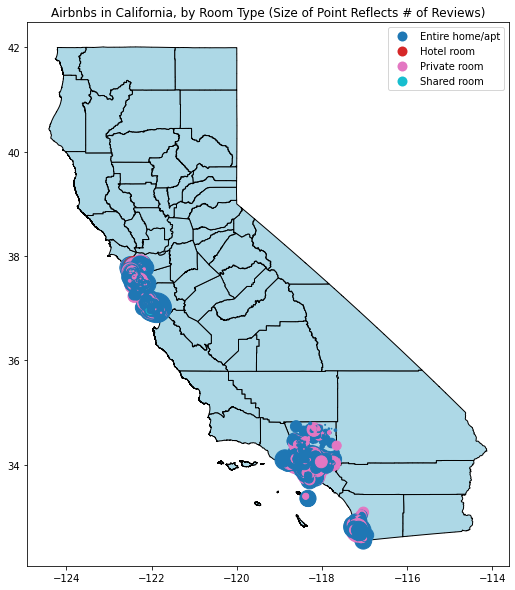

In [11]:
airbnbs_ca_gdf.crs = "EPSG:4326"
airbnbs_ca_gdf = airbnbs_ca_gdf.to_crs(calif.crs)
ax = calif.plot(color='lightblue', edgecolor='black', figsize = (10,10))
ax = airbnbs_ca_gdf.plot(ax = ax, marker='o', column = "room_type", markersize=airbnbs_ca_gdf["number_of_reviews"]/2, categorical = True, legend = True) 
ax.set_title("Airbnbs in California, by Room Type (Size of Point Reflects # of Reviews)")


### plotting hotel locations

Geocoded the hotel addresses to get longitude and latitude values and then get point geometries

In [24]:
def remove_zip_end(inp):
    return inp[:-5]
hotels['final_address'] = hotels['Address 1'] +  ', ' + hotels['State'] + ' ' + hotels['Postal Code']

hotels['final_address'] = hotels['final_address'].apply(remove_zip_end)
hotels['final_address']

0                1800 Powell St, CA 94608
1             720 Las Flores Rd, CA 94551
2       32083 Alvarado Niles Rd, CA 94587
3               5115 Hopyard Rd, CA 94588
4           47000 Lakeview Blvd, CA 94538
                      ...                
5570            1078 N Beale Rd, CA 95901
5571            1111 N Beale Rd, CA 95901
5572                   803 E St, CA 95901
5573             899 N Beale Rd, CA 95901
5574            1034 N Beale Rd, CA 95901
Name: final_address, Length: 5575, dtype: object

In [25]:
#TAKES A LONG TIME 

def get_coordinates_from_address(address):
    if not address:
        return "Invalid address", 0, 0
    try:
        geocode_result = geocode(address=address)[0]  
    except:
        return 0 
    location = geocode_result['location']
    longitude = location['x']
    latitude = location['y']
    
    return (longitude, latitude)

location = hotels['final_address'].apply(get_coordinates_from_address)


In [26]:
hotels['coords'] = location


def tup_split(row):
    if isinstance(row, tuple):
        return row
    else:
        return None, None 

hotels[['long', 'lat']] = hotels['coords'].apply(lambda x: tup_split(x)).apply(pd.Series)


In [84]:

hotels_gdf = hotels.copy()

hotels_gdf['geometry'] = hotels.apply(lambda row: Point(row['long'],row['lat']), axis=1)

hotels_gdf = gpd.GeoDataFrame(hotels_gdf, geometry='geometry')


Filtered out hotels to include only California, and then plotted the hotels based on their location type

In [30]:
hotels_gdf= hotels_gdf[hotels_gdf["State"] == "CA"]
hotels_gdf = hotels_gdf[hotels_gdf["long"] < -110]
hotels_gdf = hotels_gdf[hotels_gdf["lat"] < 45]

Text(0.5, 1.0, 'Hotels in California, by Location Type (Size of Point Reflects Size of Hotel)')

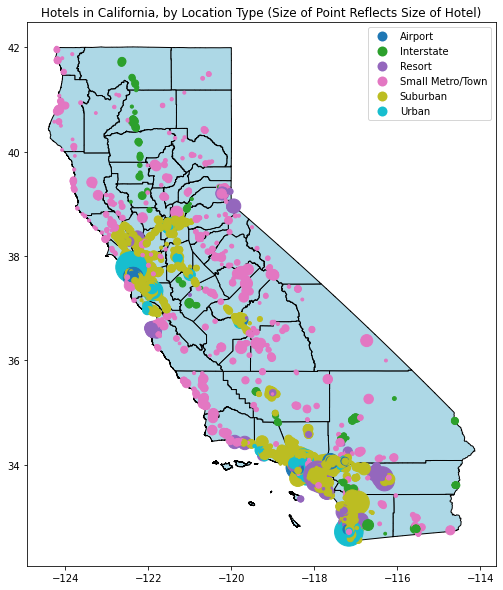

In [31]:

hotels_gdf.crs = "EPSG:4326"
hotels_gdf = hotels_gdf.to_crs(calif.crs)
ax = calif.plot(color='lightblue', edgecolor='black', figsize = (10,10))
ax = hotels_gdf.plot(ax = ax, marker='o', markersize=hotels_gdf["Rooms"]/2, column = "Location", categorical = True, legend = True) 
ax.set_title("Hotels in California, by Location Type (Size of Point Reflects Size of Hotel)")


Text(0.5, 1.0, 'Types of Location of Hotels in California')

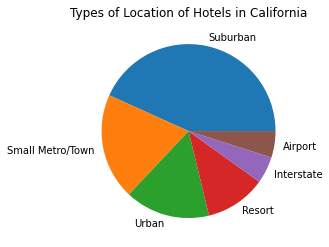

In [32]:
vals = hotels_gdf["Location"].value_counts()
plt.pie(vals, labels=vals.index)
plt.title("Types of Location of Hotels in California")

### Plotting tourist spots

Plotted tourist destinations in California

/tmp/ipykernel_114/190763537.py:5: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  buffers["geometry"] = buffers[0]


Text(0.5, 1.0, 'Tourist Attractions in California, with Buffers')

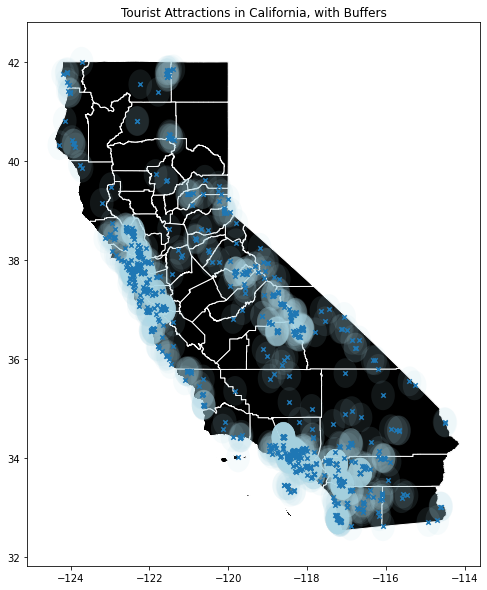

In [33]:
tourist = gpd.read_file('attraction_point.shp')

buffers = tourist.buffer(0.3)
buffers  = gpd.GeoDataFrame(buffers)
buffers["geometry"] = buffers[0]


tourist.crs = "EPSG:4326"
tourist = tourist.to_crs(calif.crs)
ax = calif.plot(color='black', edgecolor='white', figsize = (10,10))
ax = buffers.plot(ax = ax, color = "lightblue", alpha=0.1)
ax = tourist.plot(ax = ax, marker='x', markersize=20)

ax.set_title("Tourist Attractions in California, with Buffers")

### ArcGIS

In [35]:
hotels_sedf = pd.DataFrame.spatial.from_xy(hotels, "long", "lat")


In [36]:
# hotels_sedf.spatial.to_featurelayer(title="hotels_feature_layer_1", gis=gis)


In [37]:
airbnbs_sedf = pd.DataFrame.spatial.from_xy(airbnbs_ca, "longitude", "latitude")


In [38]:
# airbnbs_sedf.spatial.to_featurelayer(title="airbnbs_feature_layer_1", gis=gis)


In [40]:
search = gis.content.search("airbnbs_feature_layer_1")
airbnb_layer = search[0].layers[0]
search = gis.content.search("hotels_feature_layer_1")
hotels_layer = search[0].layers[0]


In [41]:
map_= gis.map("California", zoomlevel = 5)


In [42]:
symbol = {"type": "esriSMS",  
    "style": "esriSMSCircle",
    "color": [0, 0, 255, 255],  # yellow
    "size": 5}
renderer = {
    "type": "simple",
    "symbol": symbol,
}


hotels_layer.renderer = renderer



map_.add_layer(hotels_layer)


In [43]:
map_.add_layer(airbnb_layer)
map_

MapView(layout=Layout(height='400px', width='100%'))

## Analysis

Our initial analysis of this project was looking at the distributions of airbnbs, hotels, and tourist destinations throughout California. We did this through plotting all the point values of each dataset that we obtained and cleaned through techniques like geocoding on a polygon outline of California. We then were able to find different patterns on these three types of data. 

The major analysis that we tried to achieve through this project was looking and analyzing distances to the nearest lodgings, specifically hotels and airbnbs from tourist destinations throughout California. This was done through using Shapelys nearest point function. The first aspect to this analysis was being able to find the closest point to the tourist destination as well as converting the distance between the tourist destination and airbnb/hotel in miles. This is something different from our initial analysis plan, as we were planning to find the frequencies of visitation at all the tourist destinations, but this was not data that we were able to incorporate, so we decided to adapt. We still were able to create buffers around each tourist destination to try and further our analysis of the hotels and airbnbs in the area nearby. We also were able to query the hotels and airbnbs that were within the decided buffer zone around the tourist destination. Something that we decided to do was to try and focus on a certain area and go more deeply in seeing airbnb and hotel patterns in that specific area, which was different from our initial proposal.

Using the distances functions that we created, we were able to find the point location of the closest airbnb and hotel to each tourist destination as well as the distance in miles of said location from the tourist destination. We then decided to focus on one specific tourist destination to see if there were any specific patterns visible in the airbnb and hotels within the buffer radius of the tourist destination. We decided to analyze the Oakland Aviation Museum because it was located in the Bay Area which one of the three cluster groups of airbnbs and hotels that we noticed within California. It was also located centrally within the Bay Area cluster. We were then able to find patterns of locations of airbnbs and hotels near the Aviation Museum which will be discussed in a later section.

We then wanted to see if we could predict the success of Airbnbs using an sklearn SVM model. We based success of an airbnb through its availabilty in the next year, as if it had more openings, it was less successful of an airbnb. The factors that we used in the model were the price of the Airbnb, number of reviews in the last 12 months, and distance to the nearest hotel.

We had some additional deviations from our original analysis plan, mostly due to data limitations. We did not end up doing the following: finding out whether or not the concentration of lodgings decreases as we get further from the center of the tourist attraction, and if it does, then finding out at what rate the frequency of hotels and Airbnb’s decrease as you get further from the center of the tourist attraction. We felt as though looking at the patterns that airbnbs and hotels in the buffer formed would be more insightful.

### Distance

Found the closest Airbnb and Hotel to each tourist location as well as the miles distance

In [44]:

def calculate_nearest_facility(tourist_attraction, accommodations_gdf):
    nearest_point = nearest_points(tourist_attraction, accommodations_gdf.unary_union)[1]
    return tourist_attraction.distance(nearest_point)

def calculate_nearest_point(tourist_attraction, accommodations_gdf):
    nearest_point = nearest_points(tourist_attraction, accommodations_gdf.unary_union)[1]
    return nearest_point

def main_analysis(tourist_gdf, hotels_gdf, airbnbs_gdf):
    tourist_gdf['nearest_hotel_distance'] = tourist_gdf.geometry.apply(lambda x: calculate_nearest_facility(x, hotels_gdf))
    tourist_gdf['nearest_airbnb_distance'] = tourist_gdf.geometry.apply(lambda x: calculate_nearest_facility(x, airbnbs_gdf))
    return tourist_gdf

def main_analysis_point(tourist_gdf, hotels_gdf, airbnbs_gdf):
    tourist_gdf['nearest_hotel_point'] = tourist_gdf.geometry.apply(lambda x: calculate_nearest_point(x, hotels_gdf))
    tourist_gdf['nearest_airbnb_point'] = tourist_gdf.geometry.apply(lambda x: calculate_nearest_point(x, airbnbs_gdf))
    return tourist_gdf

def distance_miles(x):
    return round(x / 1609.34,2)

result_gdf = main_analysis(tourist, hotels_gdf, airbnbs_ca_gdf)
point_gdf = main_analysis_point(tourist, hotels_gdf, airbnbs_ca_gdf)

result_gdf['nearest_airnbnb_miles'] = result_gdf['nearest_airbnb_distance'].apply(distance_miles)
result_gdf['nearest_hotel_miles'] = result_gdf['nearest_hotel_distance'].apply(distance_miles)
result_gdf['nearest_airbnb_point'] = point_gdf['nearest_airbnb_point']
result_gdf['nearest_hotel_point'] = point_gdf['nearest_hotel_point']

distance_gdf = result_gdf.copy()
distance_gdf

,tourism,name,addr_stree,website,attraction,name_en,addr_house,wikidata,addr_postc,opening_ho,...,descriptio,minimum_he,height,geometry,nearest_hotel_distance,nearest_airbnb_distance,nearest_hotel_point,nearest_airbnb_point,nearest_airnbnb_miles,nearest_hotel_miles
0,attraction,1052 W. 6th,None,None,None,None,None,None,None,None,...,None,None,None,POINT (-118.26129 34.05325),0.004231,0.000140,POINT (-118.26499 34.05119),POINT (-118.26141 34.05318),0.0,0.0
1,attraction,107 Weller,None,None,None,None,None,None,None,None,...,None,None,None,POINT (-118.24089 34.05075),0.001162,0.000359,POINT (-118.24010 34.04989),POINT (-118.24104 34.05042),0.0,0.0
2,attraction,"11,000 Feet",Cottonwood Pass Trail,None,None,None,None,None,None,None,...,None,None,None,POINT (-118.21548 36.45353),0.203108,1.643206,POINT (-118.05751 36.58120),POINT (-118.26685 34.81113),0.0,0.0
3,attraction,1100 Wilshire,Wilshire Boulevard,None,None,None,1100,None,None,None,...,None,None,151,POINT (-118.26366 34.05224),0.001684,0.000169,POINT (-118.26499 34.05119),POINT (-118.26354 34.05235),0.0,0.0
4,attraction,18-inch Schmidt Telescope,None,None,None,None,None,None,None,None,...,None,None,None,POINT (-116.86256 33.35412),0.126379,0.290593,POINT (-116.95714 33.27029),POINT (-117.00670 33.10179),0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,attraction,None,None,None,None,None,None,None,None,None,...,None,None,None,POINT (-122.40204 37.80239),0.006450,0.001610,POINT (-122.40533 37.79685),POINT (-122.40350 37.80172),0.0,0.0
1138,attraction,None,None,None,None,None,None,None,None,None,...,None,None,None,POINT (-122.40669 37.79787),0.000288,0.000520,POINT (-122.40689 37.79808),POINT (-122.40660 37.79839),0.0,0.0
1139,attraction,None,None,None,None,None,None,None,None,None,...,None,None,None,POINT (-122.40983 37.80898),0.003604,0.002071,POINT (-122.41316 37.80762),POINT (-122.40917 37.80702),0.0,0.0
1140,attraction,None,None,None,None,None,None,None,None,None,...,None,None,None,POINT (-120.11156 38.95165),0.072882,2.337827,POINT (-120.04017 38.93700),POINT (-122.12612 37.76548),0.0,0.0


In [46]:
distance_gdf = distance_gdf[["name", "geometry", "nearest_hotel_distance", "nearest_airbnb_distance","nearest_hotel_point","nearest_airbnb_point"]]

Plotted the distance distributions of both hotels and airbnbs as well as calculated the average distance for both hotels and airbnbs from the closest tourist destination

Text(0.5, 1.0, 'Distance to Nearest Hotel From Each Tourist Destination')

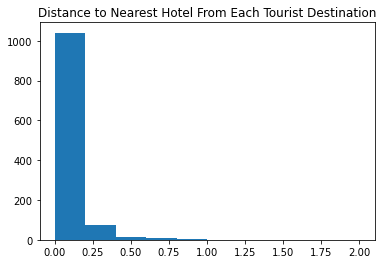

In [47]:
bins = [0,0.2,0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
plt.hist(distance_gdf["nearest_hotel_distance"], bins = bins)
plt.title("Distance to Nearest Hotel From Each Tourist Destination")

Text(0.5, 1.0, 'Distance to Nearest Airbnb From Each Tourist Destination')

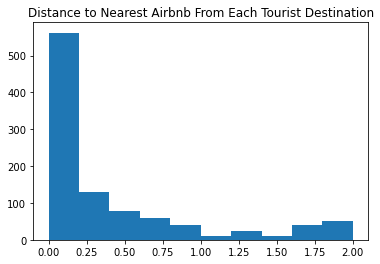

In [48]:
bins = [0,0.2,0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
plt.hist(distance_gdf["nearest_airbnb_distance"], bins = bins)
plt.title("Distance to Nearest Airbnb From Each Tourist Destination")

In [49]:
hotel_dist = (distance_gdf["nearest_hotel_distance"]).mean()
airbnb_dist = (distance_gdf["nearest_airbnb_distance"]).mean()


In [50]:
print("Average distance to the nearest hotel from tourst attractions: ")
print(str (hotel_dist))


Average distance to the nearest hotel from tourst attractions: 
0.061288881095230854


In [51]:
print("Average distance to the nearest Airbnb from tourst attractions: ")
print(str (airbnb_dist))


Average distance to the nearest Airbnb from tourst attractions: 
0.6661959838730134


## Example tourist destination 

Used the Oakland Aviation Museum as a case study to analyze patterns on airbnbs and hotels within a 20 mile radius buffer zone around it

In [77]:
tourist_mini = tourist[20:21] 
tourist_mini["geometry"]

20    POINT (-118.46928 33.99148)
Name: geometry, dtype: geometry

/tmp/ipykernel_114/900114677.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffers = tourist_mini.buffer(0.3)
/tmp/ipykernel_114/900114677.py:5: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  buffers["geometry"] = buffers[0]


Text(0.5, 1.0, 'Example Tourist Attraction: Oakland Aviation Museum')

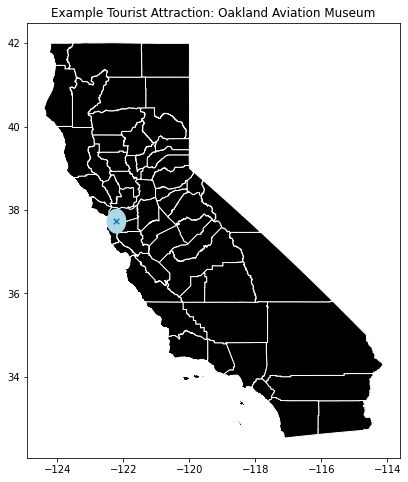

In [78]:
tourist_mini = tourist[16:17] 

buffers = tourist_mini.buffer(0.3)
buffers  = gpd.GeoDataFrame(buffers)
buffers["geometry"] = buffers[0]


tourist_mini.crs = "EPSG:4326"
tourist_mini = tourist_mini.to_crs(calif.crs)
ax = calif.plot(color='black', edgecolor='white', figsize = (8,8))
ax = buffers.plot(ax = ax, color = "lightblue", alpha=1)
ax = tourist_mini.plot(ax = ax, marker='x', markersize=30)

ax.set_title("Example Tourist Attraction: Oakland Aviation Museum")

Zoomed into buffer zone to analyze hotel patterns around the Oakland Aviation Museum

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/tmp/ipykernel_114/1328236210.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_hotel_gdf = gpd.sjoin(hotels_gdf, buffers, how="inner", op="within")


Text(0.5, 1.0, 'Hotels in Buffer Near Oakland Aviation Museum')

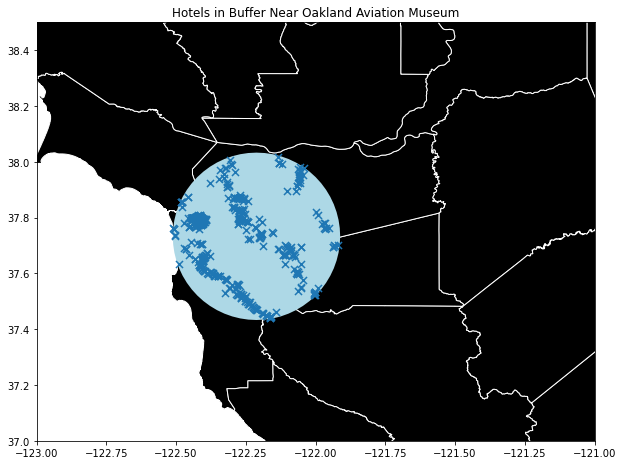

In [86]:
joined_hotel_gdf = gpd.sjoin(hotels_gdf, buffers, how="inner", op="within")
ax = calif.plot(color='black', edgecolor='white', figsize = (10,10))
ax = buffers.plot(ax = ax, color = "lightblue", alpha=1)
ax = joined_hotel_gdf.plot(ax =ax, marker='x', markersize=50)


min_x, min_y, max_x, max_y = [-123, 37, -121, 38.5]
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)


ax.set_title("Hotels in Buffer Near Oakland Aviation Museum")

Zoomed into buffer zone to analyze airbnb patterns around the Oakland Aviation Museum

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


Text(0.5, 1.0, 'Airbnbs in Buffer Near Oakland Aviation Museum')

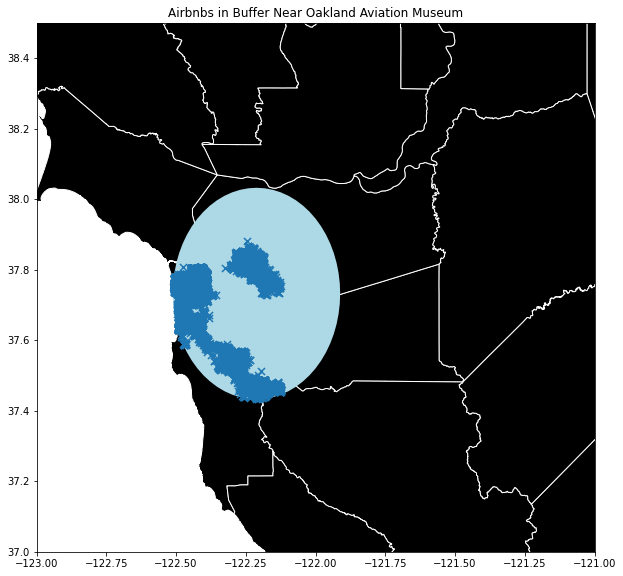

In [87]:

joined_airbnb_gdf = gpd.sjoin(airbnbs_ca_gdf, buffers, how="inner", op="within")
ax = calif.plot(color='black', edgecolor='white', figsize = (10,10))
ax = buffers.plot(ax = ax, color = "lightblue", alpha=1)
ax = joined_airbnb_gdf.plot(ax = ax, marker='x', markersize=50)

min_x, min_y, max_x, max_y = [-123, 37, -121, 38.5]
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)

ax.set_title("Airbnbs in Buffer Near Oakland Aviation Museum")

### Model

Created an SVM model to calculate success of airbnb through the variable of the availability in the next year

In [88]:
airbnbs_ca_gdf["nearest_airbnb_point"] = airbnbs_ca_gdf["geometry"]
result_gdf_mini = result_gdf[['tourism', 'name','geometry',
       'nearest_hotel_distance', 'nearest_airbnb_distance',
       'nearest_airnbnb_miles', 'nearest_hotel_miles', 'nearest_hotel_point',
       'nearest_airbnb_point']]


In [89]:
selected_cols = result_gdf_mini.merge(airbnbs_ca_gdf, on = "nearest_airbnb_point", how = "left")
x = selected_cols[["price", "nearest_hotel_distance", "number_of_reviews_ltm"]]
y = selected_cols[['availability_365']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)


In [95]:

model = svm.SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [98]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.096077007910995


In [99]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1.0469369646311066


In [100]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  0.7292687946210166


In [101]:
errors = y_test - y_pred
mean_error = errors.mean()
print("Accuracy: "+ str(abs(mean_error)))

Accuracy: 0.398350533553212


Plotted the distribution of predictions

In [110]:
df = pd.DataFrame()

y_test_li = []
for i in y_test:
    y_test_li.append(float(i[0]))
    
y_pred_li = []
for i in y_pred:
    y_pred_li.append(float(i))
    
df["preds"] = y_pred_li
df["test"] = y_test_li
df = df.sort_values(by="test")

Text(0.5, 1.0, 'Y predictions distribution')

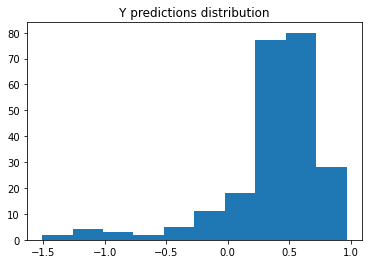

In [111]:
plt.hist(df["preds"])
plt.title("Y predictions distribution")

Text(0.5, 1.0, 'Y value of testing data distribution')

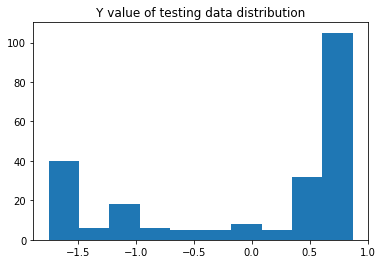

In [109]:
plt.hist(df["test"])
plt.title("Y value of testing data distribution")

Plotting the accuracy through a scatterplot showing the real values and predicted values

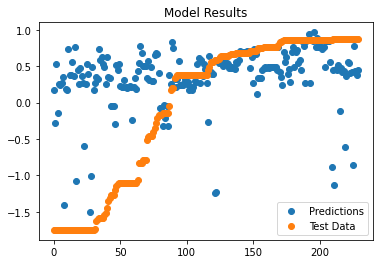

In [112]:
plt.scatter(range(len(df)), df["preds"], label='Predictions') 
plt.scatter(range(len(df)), df["test"], label='Test Data')

plt.legend()  
plt.title("Model Results")
plt.show()


## Summary of Products and Results

Based on our analysis, a major takeaway that we found was that the average closest distance of a hotel from a popular tourist destination was around 0.06 miles away while the average closest distance of an airbnb from a popular tourist destination was around 0.67 miles away. The distribution we found shows that if you are at the average tourist attraction, the closest hotel will be a lot closer to you than the closest Airbnb - by a huge difference. We then picked a specific tourist destination to look more deeply at, The Oakland Aviation Museum. This specific location was chosen because it was in one of the three discovered clusters (the Bay Area, Los Angeles, or San Diego) and it was central within the Bay Area cluster. After creating the 20 mile radius buffer, we found lodging patterns for both airnbs and hotels. The hotels near this tourist destination followed the highways, which made sense to us, as this would provide easy access to travelers to find lodging. Airbnbs were more clustered in residential areas, separated only through geographical obstacles, like the mountain range. Overall, we realized that Airbnbs would provide more options for lodging in comparison to hotels, but hotels were more accessible from highways. Through this one case study, we were able to find a lot of insights. Our model's accuracy was very variable, and was able to achieve an accuracy of 50% depending on the training and testing data split.

## Discussion

The discussion should include the following parts:

**1) Discuss your findings with respect to the literature sources in section 3. What do the results mean in the context of what is already known? What is new? Does it validate what was found in literature? How do your results improve our understanding of the problem?**

Our analysis of the geographical distribution of Airbnb and hotels in California aligns with findings from existing literature. The literature suggests that short-term rentals, such as Airbnbs, play a significant role in shaping local economies and accommodating tourists in popular destinations which is emphasized in both Dubetz et al. and Lehr. Not only is the hotel/airbnb industry boosted by this, but also other markets like restaurants and grocery stores. The competition between Airbnb and traditional hotels for the same market share, a notion supported by our observation of geospatial proximity between Airbnb hubs and hotel clusters.

Our analysis builds upon other research by investigating the relationship between lodging options and tourist destinations in California. La et al. examined this relationship between lodging and touris destinations in London, but our study extends this analysis to California. By focusing on California, we contribute new insights into the spatial distribution and coexistence of Airbnb and hotels in a diverse tourism landscape. This is particularly applicable to us since we live and study in California.

Additionally, our study offers practical implications for policymakers and hospitality businesses. Leick et al. discussed the spillover effects of Airbnb on traditional accommodations in regional tourism markets, something we explored in the context of California. When Airbnb first started, business boomed because of its affordability compared to hotels. Our findings suggest that Airbnbs can stimulate overall tourism growth in certain destinations, posing as a major component for hotels and other lodging.

Overall, our results align with existing literature on the distribution and impact of Airbnbs and hotels. Our analysis only provides novel insights specific to California's tourism economy between lodging options and tourist destinations in the region.

**2) Of particular importance is a discussion of any trade-offs and decision points that you had to consider. This may include a discussion of any performance issues, width of buffers you applied, projections you chose, spatial operations you used, machine learning techniques, and other issues we discussed in class.**

During our analysis, we encountered several trade-offs and decision points that influenced the direction we went in our work. One of them, was using the width of buffers applied around tourist destinations to assess the proximity of Airbnb and hotels. We opted for a 20-mile radius buffer to capture a comprehensive view of lodging patterns while ensuring computational feasibility.

We also had to adapt our analysis approach based on data availability and limitations. For example, while our initial plan included analyzing frequencies of visitation at tourist destinations, we had to pivot to focus on distances to the nearest lodgings due to data constraints. This flexibility allowed us to still extract valuable insights despite unforeseen challenges.

Furthermore, our decision to utilize a machine learning model to predict the success of Airbnb listings required careful consideration of input features and model performance. We chose factors such as price, number of reviews, and distance to the nearest hotel as predictors, aiming to capture relevant dimensions of Airbnb performance given the data we had, and what we realized would affect the success of Airbnbs the most. We do acknowledge the variability in model accuracy and the need for further refinement and validation.


## Conclusions and Future Work

**Did you manage to completely answer your initial research question?**

We were able to completely answer our initial research questions about the concentration of Airbnb and hotels in California surrounding popular tourist destinations. By calculating the distance between hotels/airbnbs to tourist destinations, we were able to find whether the tourist destination required more lodging, or if there were other nearby areas that might have potential for Airbnbs to be put in place. There is a higher concentration of Airbnb and hotels in California surrounding popular destinations, especially in the LA, San Diego, Yosemite/National Park Area, and the Bay Area. This makes sense given that so many tourists that flock to California to see many of the beautiful and must-see destinations that California has to offer. Surrounding almost all tourist destinations, there are plenty of lodging areas for people to stay at, and we additionally predicted the success of the Airbnbs based on many of the factors of the Airbnb. 


**If not, what additional data and additional analysis steps can you think of?**

Understanding seasonally where Airbnbs versus hotels might be required is another analysis point we wanted to look at. Some tourist destinations may be popular in winter because of the snow versus summer because of the beach, requiring an increase in booking hotels/airbnbs during those times. Finding this information could tell us whether more or less Airbnbs might be required during those times specifically, since some Airbnbs can only be "free" during certain seasons. Additionally, finding *all* airbnbs in California would be helpful, as we can see other areas that people might travel to outside the major three (socal, bay area, and national parks) that we primarily focused on in our analysis. This would be helpful for both travelers and Airbnb/home owners to know where to list their Airbnbs/homes for the best profit. 


**Can your approach be extended to other areas or topics, and use additional datasets?**

Yes our approach can be extended to other areas, such as the entire United States, and even the entire world for locations that provide Airbnb services. All we would need are datasets with Airbnbs, hotels, and tourist destinations for the rest of the world, and we would be able to do similar analyses. Vrbo and Homeaway are two similar agencies that provide home services similar to Airbnb that might find our analysis helpful as well, so getting data about their houses and lodging could definitely be done given the right data. Finally, we could do a deeper analysis into each tourist point and lodging situation similar to our analysis on the Oakland Aviation Museum. This would help show 


**How do you expect the results to be used and by whom?**

We expect the results to be used by three main stakeholders -- tourists looking to visit a certain destination, Airbnbs owners/potential owners, and less so, hotel owners. Using the informatino from our results, they could figure out which areas in California are most profitable, down to a city, neighborhood, and even street to buy land or a house for the business. They can use the information we provide to see which tourist destinations or housing locations are most convenient to each other for both housing and other travel needs (ie: grocery stores, restaurants nearby). Based on the distribution of hotels and Airbnb listings, analysts can also infer the appeal of a specific tourist destination and estimate the typical number of visitors present in the vicinity.